<a href="https://colab.research.google.com/github/SaurabhAradwad/EDA-Capstone/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Airbnb Booking Analysis**

**Capstone Project EDA**

**Team - pro-infinity**

**Team Members - Ayush Sharma, Saurabh Aradwad, Rishika Rai, Aman Guleria**

**Problem statement**

>

Airbnb is a privately held website that connects homeowners with travelers looking for
 accommodations. With the help of few guidelines that allow hosts to compare their listings to
 others in the area to determine a fair price, Airbnb gives its hosts unlimited freedom
 to set the price for their units. On the other hand, guests who use Airbnb frequently 
experience lodging issues for a variety of reasons. Seasonal rushes, unforeseen 
cancellations of reservations, host preferences, etc. may all fall under this category.

Airbnb wants to know more about their customers and providers (hosts) so, What kind of measures can be taken to improve security, What can be their 

* Which are the busiest or least busy areas according to customers or hosts and why?
* What can we learn from different pricing in different areas?
* What is our new marketing initiatives as well as the implementation of innovative additional services? 
* What can be their further business decisions?

### Basic imports and csv mounting 

In [ ]:
# Importing all the required libraries for the analysis of given dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Connecting to GitHub repository 

! git clone https://github.com/SaurabhAradwad/EDA-Capstone.git

Cloning into 'EDA-Capstone'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 86 (delta 51), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (86/86), done.


In [ ]:
# importing csv file

airbnb = pd.read_csv("/content/EDA-Capstone/Airbnb NYC 2019.csv")
 

In [ ]:
# Checking csv mounting

airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Basic DataFrame Inspection using methods and functions

In [ ]:
# Computing Dataset length using length function 

len(airbnb)

48895

In [ ]:
# Checking All 16 columns

airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Analysing Columns Data with the help of transpose

airbnb.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [ ]:
# Checking last rows with the help of tail method

airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# Checking the number of rows and columns of the DataFrame

airbnb.shape

(48895, 16)

In [ ]:
# Getting summry statistics of DataFrame
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Looking for and handling NaN/ Null/ Missing Values


In [ ]:
# Detailed review of entire data including all entries, null info and data type

airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Which are the busiest or least busy areas according to customers or hosts and why?

In [ ]:
# Which are the busiest or least busy areas according to customers or hosts and why?

# Droping some of the columns for further analysis(selction of columns is done on the basis of areas and host info)

airbnb.drop(['id','name','latitude','longitude','number_of_reviews','last_review','reviews_per_month'], axis=1, inplace=True)
airbnb.head()



,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,Private room,149,1,6,365
1,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,2,355
2,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,1,194
4,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,1,0


### Comment Regarding Null values 
There is no any need or requirement for treating  Null values in given dataset


In [ ]:
# Examining the unique values of n_group as this column will appear very handy for later analysis

u_neighbourhood_group = airbnb.neighbourhood_group.unique()

print(u_neighbourhood_group)

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [ ]:
# Examining the unique values of neighbourhood as this column will appear very handy for later analysis

U_ne = airbnb.neighbourhood.unique()
print(U_ne)

['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 'Queens Village' 'Rockaway Beach' 'Forest Hills' 'Nolita'
 'Woodlawn' 'University Heights' '

In [ ]:
len(U_ne)

221

In [ ]:
# Selcting unique values for finding out busy areas with the help of neighbourhood_groups, 

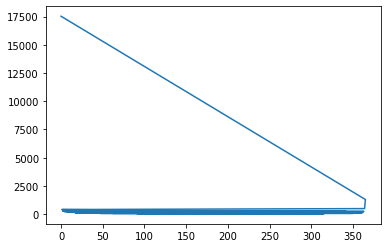

In [ ]:
#

pd.value_counts(airbnb['availability_365']).plot(kind="line");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


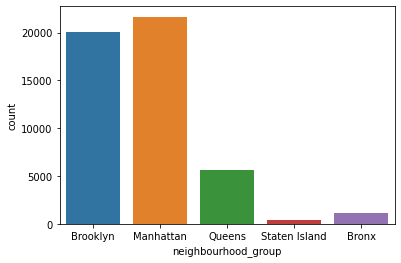

In [ ]:
# Countplot for neighbourhood_group using sns. It will give us histogram of count for areas.

sns.countplot(airbnb.neighbourhood_group);

In [ ]:
# Data sorting and counting for areas and hosts

drops = airbnb[['host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights','calculated_host_listings_count','availability_365']]

#hosts = airbnb[['host_id', 'host_name', 'neighbourhood_group', 'calculated_host_listings_count','availability_365']]

#hosts_sorted = hosts.sort_values(['calculated_host_listings_count','availability_365'], ascending = [False,True])

#print(hosts_sorted.head(10))

drops_sorted = drops.sort_values(['calculated_host_listings_count','availability_365'], ascending = [False,True])

print(drops_sorted)

In [ ]:
#finding out top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10)


Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [ ]:
airbnb.neighbourhood_group.value_counts().head()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
# examining the unique values of room_type as this column will appear very handy for later analysis

airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


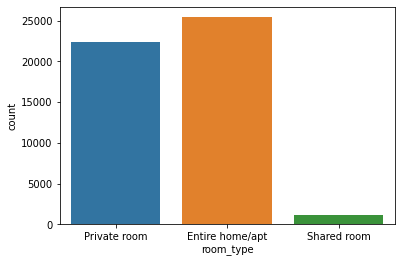

In [ ]:
# Countplot for room_type: gives us idea about availabilty of types 

sns.countplot(airbnb.room_type);

In [ ]:
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

KeyError: ignored

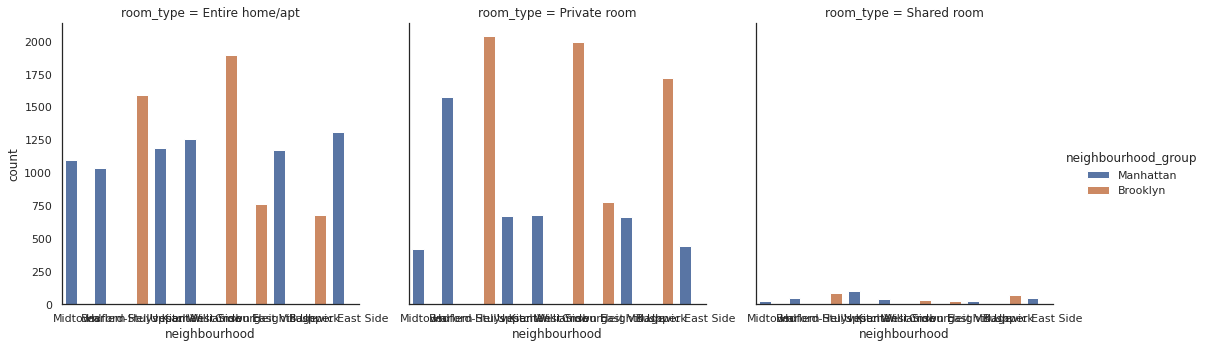

In [ ]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')